<a href="https://colab.research.google.com/github/sabaakram539/Customer_Segmentation_Project/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation Case Study**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("Data_problem  1.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **Data Preprocessing**

In [ ]:
data=data.drop(['CUST_ID'],axis=1)

In [ ]:
data.shape

(8950, 17)

>> ## **Dealing with missing values**

In [ ]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

In [ ]:
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

>> ## **Dealing with outliers**

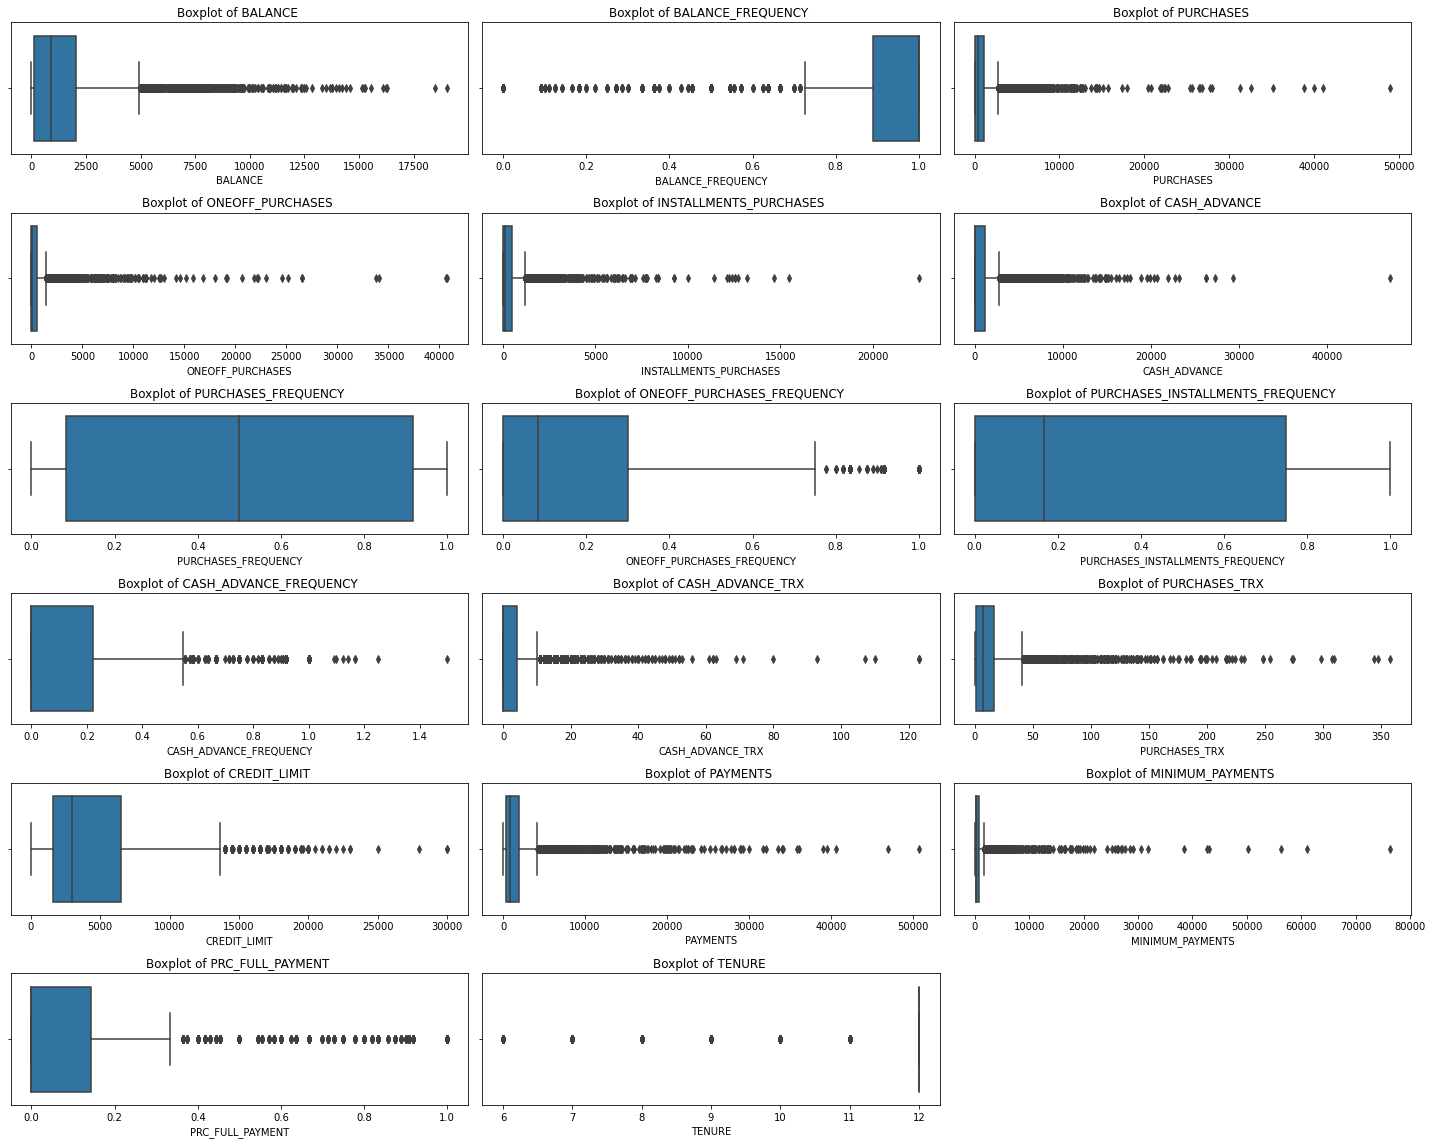

In [ ]:
plt.figure(figsize=(20,16))
features=data.columns
for i in range(len(features)):
  plt.subplot(6,3,i+1)
  sns.boxplot(data[features[i]])
  plt.title(f"Boxplot of {features[i]} ")
  plt.tight_layout()

We have ouliiers everywhere but only in the two columns namely PURCHASES_FREQUENCY and PURCHASES_INSTALLMENT_FREQUENCY

In [ ]:
def detect_outliers(columns):
  q1,q3=columns.quantile([0.25,0.75])
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower, upper


In [ ]:
columns=data.columns
for i in columns:
  lr,ur=detect_outliers(data[i])
  data[i]=np.where(data[i]>ur,ur,data[i])
  data[i]=np.where(data[i]<lr,lr,data[i])

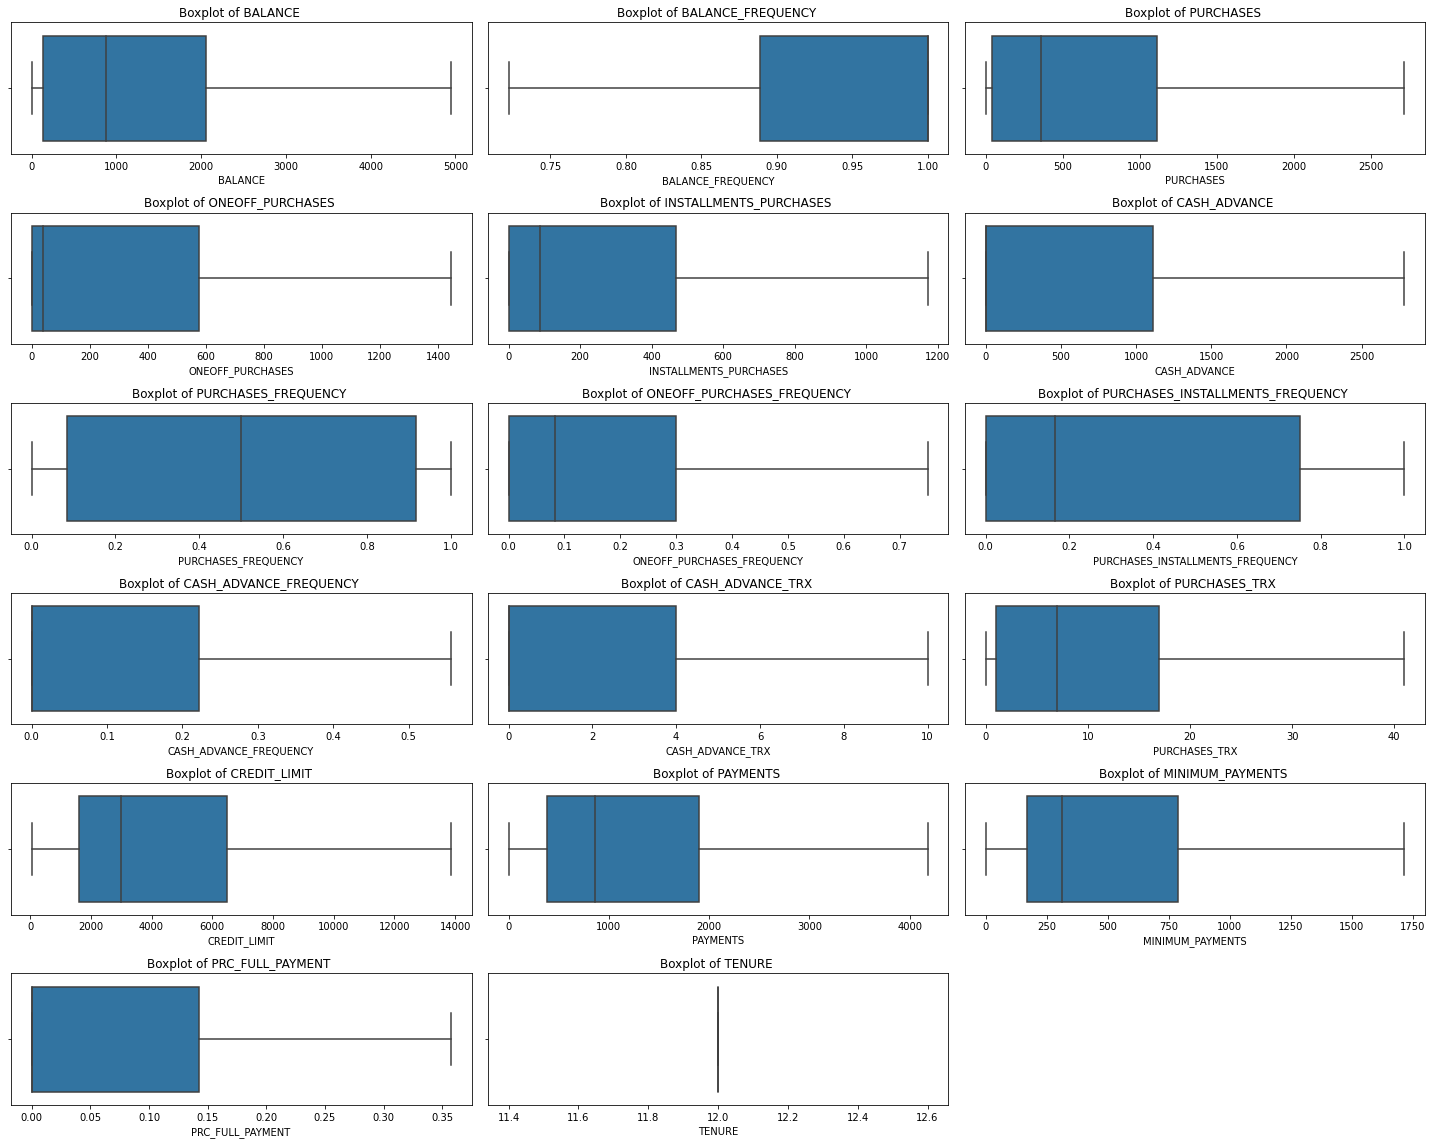

In [ ]:
plt.figure(figsize=(20,16))
features=data.columns
for i in range(len(features)):
  plt.subplot(6,3,i+1)
  sns.boxplot(data[features[i]])
  plt.title(f"Boxplot of {features[i]} ")
  plt.tight_layout()

# **Advanced Data Preparation**
**Building an enriched customer profile by deriving intelligent KPI's**

>> ## **Monthly Average Purchase**

In [ ]:
data['Monthly_Avg_Purchase']=data['PURCHASES']/data['TENURE']

>> ## **Monthly Cash Advance Amount**

In [ ]:
data['Monthly_Cash_Adv_Amt']=data['CASH_ADVANCE']/data['TENURE']

>> ## **Purchases by type (One Time, Installments)**

In [ ]:
data[(data['ONEOFF_PURCHASES']==0)&(data['INSTALLMENTS_PURCHASES']==0)].shape   # Neither oneoff nor installment

(2042, 19)

In [ ]:
data[(data['ONEOFF_PURCHASES']>0)&(data['INSTALLMENTS_PURCHASES']==0)].shape    # Oneoff only

(1874, 19)

In [ ]:
data[(data['ONEOFF_PURCHASES']==0)&(data['INSTALLMENTS_PURCHASES']>0)].shape    # Installments only

(2260, 19)

In [ ]:
data[(data['ONEOFF_PURCHASES']>0)&(data['INSTALLMENTS_PURCHASES']>0)].shape     # Both oneoff and installments

(2774, 19)

In [ ]:
def purchase_type(data):
  if (data['ONEOFF_PURCHASES']==0)&(data['INSTALLMENTS_PURCHASES']==0):
    return "None"
  elif (data['ONEOFF_PURCHASES']>0)&(data['INSTALLMENTS_PURCHASES']==0):
    return "Oneoff Only"
  elif (data['ONEOFF_PURCHASES']==0)&(data['INSTALLMENTS_PURCHASES']>0):
    return "Installments Only"
  else:
    return "Both"

In [ ]:
data['Purchase_Type']=data.apply(purchase_type,axis=1)

In [ ]:
data.Purchase_Type.value_counts()

Both                 2774
Installments Only    2260
None                 2042
Oneoff Only          1874
Name: Purchase_Type, dtype: int64

>> ## **Average Amount Per Purchase**

In [ ]:
data['Avg_Amt_Per_Purchase']=data['PURCHASES']/data['PURCHASES_FREQUENCY']

>> ## **Average Oneoff Purchases Amount**

In [ ]:
data['Avg_1off_Purches_Amt']=data['ONEOFF_PURCHASES']/data['ONEOFF_PURCHASES_FREQUENCY']

>> ## **Average Installment Purchases Amount**

In [ ]:
data['Avg_Ins_Purches_Amt']=data['INSTALLMENTS_PURCHASES']/data['PURCHASES_INSTALLMENTS_FREQUENCY']

>> ## **Average Cash Advance Transaction**

In [ ]:
data['Avg_Csh_Adv_Trsn']=data['CASH_ADVANCE_TRX']/data['TENURE']

>> ## **Limit Usage (Balance to Credit Limit Ratio)**

In [ ]:
data['Limit_Usage']=data['BALANCE']/data['CREDIT_LIMIT']

>> ## **Payments to Minimum Payment Ratio**

In [ ]:
data['Pay_MinPay_Ratio']=data['PAYMENTS']/data['MINIMUM_PAYMENTS']

>> ## **Average Monthly Payments**

In [ ]:
data['Monthly_Payments']=data['PAYMENTS']/data['TENURE']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [ ]:
data.isnull().sum()

BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                       0
TENURE                                 0
Monthly_Avg_Purchase                   0
Monthly_Cash_Adv_Amt                   0
Purchase_Type                          0
Avg_Amt_Per_Purchase                2043
Avg_1off_Purches_Amt                4302
Avg_Ins_Purches_Amt                 3915
Avg_Csh_Adv_Trsn                       0
Limit_Usage     

Here we have null values because in all these three cases we divided with their respective purchases and at many rows where we have 0 purchases. Now we will fill these null values with 0. 

In [ ]:
data=data.fillna(0)

## **Insights from the KPI's**

In [ ]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Adv_Amt,Purchase_Type,Avg_Amt_Per_Purchase,Avg_1off_Purches_Amt,Avg_Ins_Purches_Amt,Avg_Csh_Adv_Trsn,Limit_Usage,Pay_MinPay_Ratio,Monthly_Payments
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,Installments Only,572.398855,0.000000,1144.804579,0.000000,0.040901,1.446508,16.816840
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,232.046071,None,0.000000,0.000000,0.000000,0.333333,0.457495,3.826241,341.919383
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,Oneoff Only,773.170000,1030.893333,0.000000,0.000000,0.332687,0.991682,51.838895
3,1666.670542,0.722222,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,124.916667,17.149001,Oneoff Only,17988.071952,17322.219289,0.000000,0.083333,0.222223,0.000000,0.000000
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,Oneoff Only,192.000768,192.000768,0.000000,0.000000,0.681429,2.771075,56.527897


In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Adv_Amt,Avg_Amt_Per_Purchase,Avg_1off_Purches_Amt,Avg_Ins_Purches_Amt,Avg_Csh_Adv_Trsn,Limit_Usage,Pay_MinPay_Ratio,Monthly_Payments
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1390.508973,0.931587,737.149330,354.358139,295.546214,672.468924,0.490351,0.184773,0.364437,0.126061,2.383128,11.623799,4419.137221,1347.084165,556.752385,0.087223,12.0,61.429111,56.039077,1329.479857,1192.423815,484.598629,0.198594,0.374253,8.230473,112.257014
std,1537.538479,0.110984,879.534788,511.823289,396.181546,998.514970,0.401371,0.255668,0.397448,0.172676,3.417878,13.041645,3383.788645,1272.806272,532.174180,0.138616,0.0,73.294566,83.209581,1975.298392,2087.620515,695.634099,0.284823,0.379138,115.560746,106.067189
min,0.000000,0.722222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.0,3.302917,0.000000,158.774968,0.000000,0.000000,0.000000,0.041551,0.970969,31.939680
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.0,30.106667,0.000000,738.329481,334.081336,243.870122,0.000000,0.303631,2.144870,71.408462
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.0,92.510833,92.818428,1914.461417,1923.142461,809.949930,0.333333,0.659057,5.607400,158.427860
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4177.921543,1715.497270,0.357142,12.0,226.322708,232.046071,32590.600362,17322.219289,14059.181237,0.833333,15.909951,6840.528861,348.160129


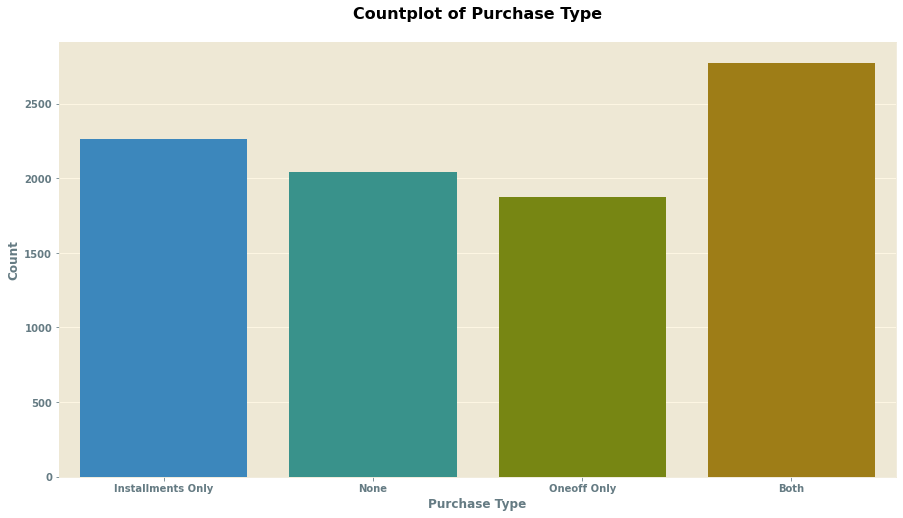

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
sns.countplot(data['Purchase_Type'])
plt.xlabel("Purchase Type",fontweight="bold")
plt.ylabel('Count',fontweight="bold")
plt.title("Countplot of Purchase Type\n",fontweight="bold",color='black')
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()

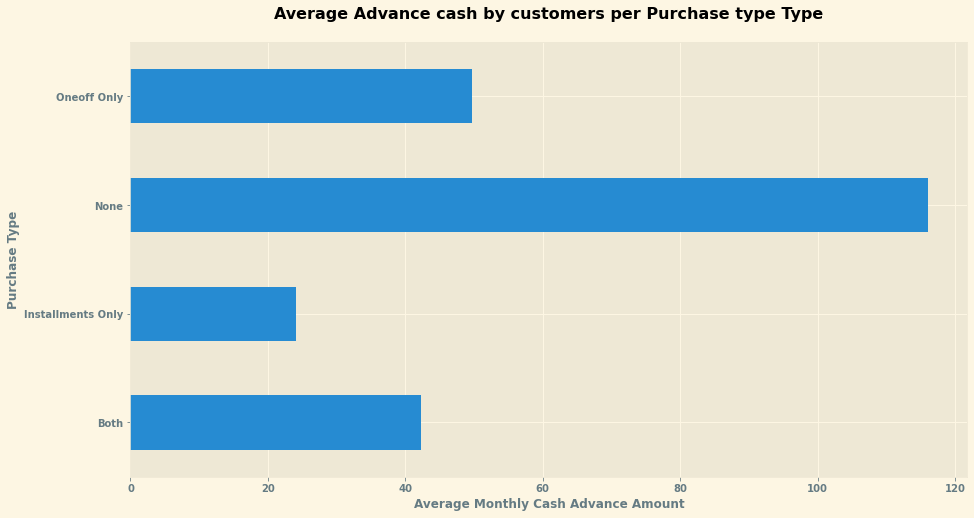

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_Cash_Adv_Amt'])).plot.barh()
plt.xlabel("Average Monthly Cash Advance Amount",fontweight="bold")
plt.ylabel('Purchase Type',fontweight="bold")
plt.title("Average Advance cash by customers per Purchase type Type\n",fontweight="bold",color='black')
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()

The customers who don't purchase either in installments or OneTime take more advances.

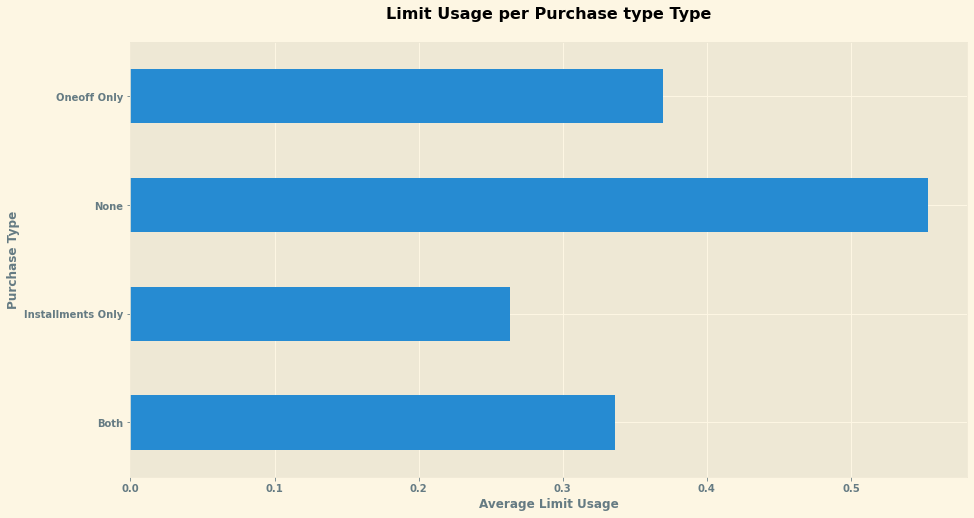

In [ ]:
plt.figure(figsize=(15,8))
data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage'])).plot.barh()
plt.xlabel("Average Limit Usage",fontweight="bold")
plt.ylabel('Purchase Type',fontweight="bold")
plt.title("Limit Usage per Purchase type Type\n",fontweight="bold",color='black')
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.show()

The customer which don't purchase either OneTime or in Installments has the high Average Limit Usage.

In [ ]:
data[["Monthly_Avg_Purchase","Monthly_Cash_Adv_Amt","Avg_Amt_Per_Purchase","Avg_1off_Purches_Amt"
    ,"Avg_Ins_Purches_Amt","Avg_Csh_Adv_Trsn","Limit_Usage","Pay_MinPay_Ratio","Monthly_Payments"]].describe()

,Monthly_Avg_Purchase,Monthly_Cash_Adv_Amt,Avg_Amt_Per_Purchase,Avg_1off_Purches_Amt,Avg_Ins_Purches_Amt,Avg_Csh_Adv_Trsn,Limit_Usage,Pay_MinPay_Ratio,Monthly_Payments
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,61.429111,56.039077,1329.479857,1192.423815,484.598629,0.198594,0.374253,8.230473,112.257014
std,73.294566,83.209581,1975.298392,2087.620515,695.634099,0.284823,0.379138,115.560746,106.067189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.302917,0.000000,158.774968,0.000000,0.000000,0.000000,0.041551,0.970969,31.939680
50%,30.106667,0.000000,738.329481,334.081336,243.870122,0.000000,0.303631,2.144870,71.408462
75%,92.510833,92.818428,1914.461417,1923.142461,809.949930,0.333333,0.659057,5.607400,158.427860
max,226.322708,232.046071,32590.600362,17322.219289,14059.181237,0.833333,15.909951,6840.528861,348.160129


# **Identification of Relationships**

In [ ]:
correlation_matrix=data.corr()

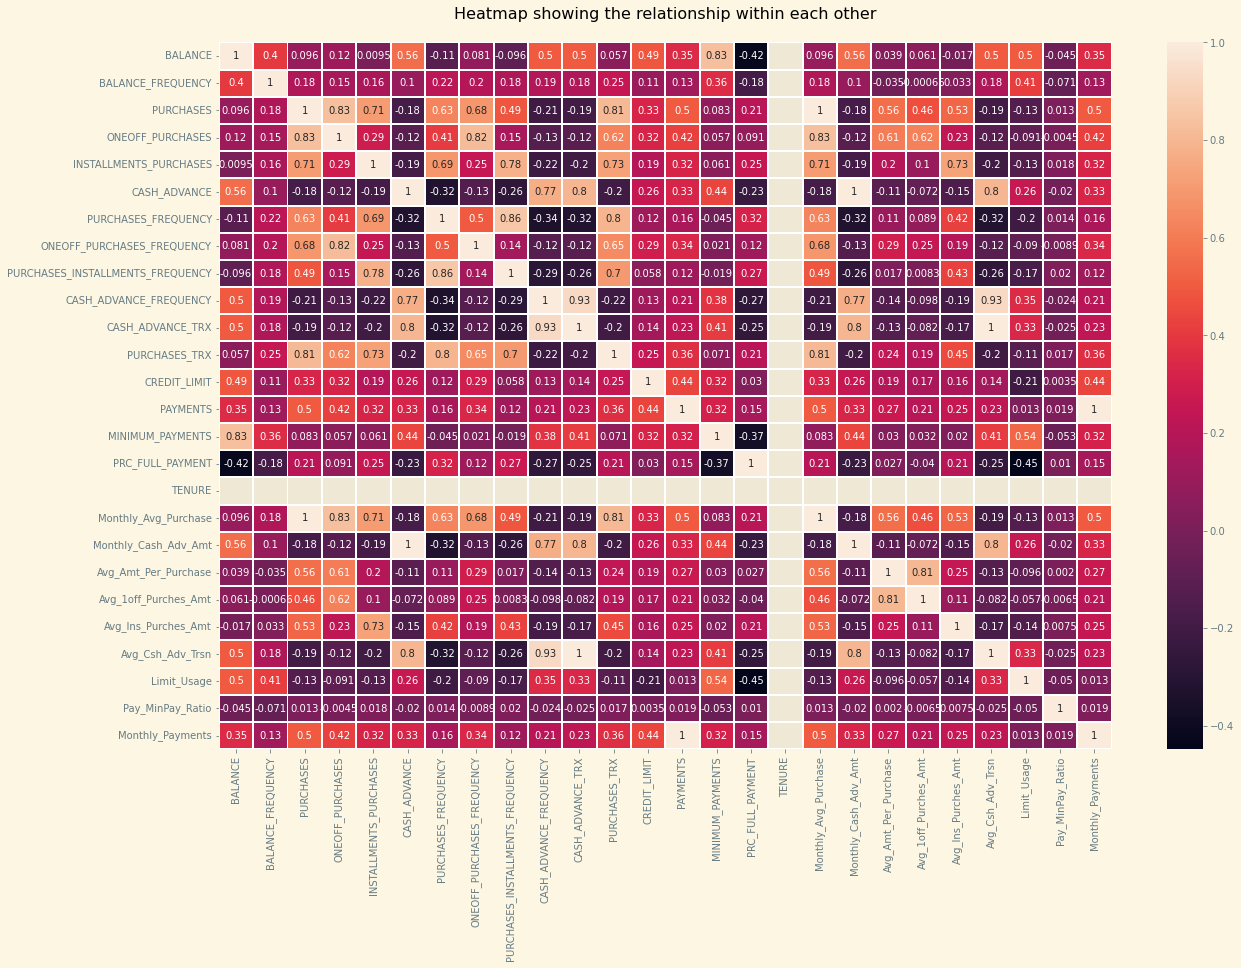

In [ ]:
plt.figure(figsize=(20,13))
sns.heatmap(correlation_matrix,annot=True,linewidths=1)
plt.title('Heatmap showing the relationship within each other\n',color='black')
plt.show()

As we can see CASH_ADVANCE_TRX, PAYMENTS and CASH_ADVANCE are perfectly correlated with Avg_Cash_Adv_trsn, Monthly_Payments and Monthly_Cash_Advance_Amt. We will deal with with these perfectly correlated variables during PCA, alongwith other highly correlatedvariables.

# **Building a KMeans cluster algorithm**

>> ## **Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Adv_Amt',
       'Purchase_Type', 'Avg_Amt_Per_Purchase', 'Avg_1off_Purches_Amt',
       'Avg_Ins_Purches_Amt', 'Avg_Csh_Adv_Trsn', 'Limit_Usage',
       'Pay_MinPay_Ratio', 'Monthly_Payments'],
      dtype='object')

In [ ]:
data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
      'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
      'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Adv_Amt','Avg_Amt_Per_Purchase', 'Avg_1off_Purches_Amt','Avg_Ins_Purches_Amt', 'Avg_Csh_Adv_Trsn', 'Limit_Usage',
       'Pay_MinPay_Ratio', 'Monthly_Payments', 'Monthly_Cash_Adv_Amt']]=sc.fit_transform(data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
        'INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE', 'Monthly_Avg_Purchase','Monthly_Cash_Adv_Amt',
        'Avg_Amt_Per_Purchase', 'Avg_1off_Purches_Amt','Avg_Ins_Purches_Amt', 'Avg_Csh_Adv_Trsn', 'Limit_Usage','Pay_MinPay_Ratio', 'Monthly_Payments',
         'Monthly_Cash_Adv_Amt']])

In [ ]:
dummy=pd.get_dummies(data['Purchase_Type'])

In [ ]:
dummy.head()

,Both,Installments Only,None,Oneoff Only
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
data=pd.concat([data,dummy],axis=1)

In [ ]:
data.drop(['Purchase_Type','None'],axis=1,inplace=True)

In [ ]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Adv_Amt,Avg_Amt_Per_Purchase,Avg_1off_Purches_Amt,Avg_Ins_Purches_Amt,Avg_Csh_Adv_Trsn,Limit_Usage,Pay_MinPay_Ratio,Monthly_Payments,Both,Installments Only,Oneoff Only
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.784078,-0.629277,0.0,-0.729687,-0.673507,-0.383296,-0.571220,0.949124,-0.697293,-0.879288,-0.058708,-0.899859,0,1,0
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.968887,0.973961,0.0,-0.838160,2.115343,-0.673090,-0.571220,-0.696668,0.473089,0.219568,-0.038114,2.165375,0,0,0
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.132544,-0.629277,0.0,0.040957,-0.673507,-0.281649,-0.077380,-0.696668,-0.697293,-0.109642,-0.062644,-0.569653,0,0,1
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.459290,-0.629277,0.0,0.866246,-0.467401,8.433927,7.726834,-0.696668,-0.404697,-0.401013,-0.071226,-1.058417,0,0,1
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.586234,-0.629277,0.0,-0.819967,-0.673507,-0.575884,-0.479244,-0.696668,-0.697293,0.810239,-0.047245,-0.525443,0,0,1


>> ## **Dimension Reduction**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=29)

In [ ]:
data_pca=pca.fit(data)

In [ ]:
sum(data_pca.explained_variance_ratio_)

0.9999999999999999

In [ ]:
variance_ratio={}
for i in range(2,30):
  pca=PCA(n_components=i)
  data_pca=pca.fit(data)
  variance_ratio[i]=sum(data_pca.explained_variance_ratio_)

In [ ]:
variance_ratio

{2: 0.5232260603539773,
 3: 0.6158355679739297,
 4: 0.6904389191631288,
 5: 0.7376291792523559,
 6: 0.7832469152792401,
 7: 0.8222631370190631,
 8: 0.8574783046034298,
 9: 0.8840781951988452,
 10: 0.907190777104975,
 11: 0.9266383018073628,
 12: 0.9419068418429732,
 13: 0.9527810337254489,
 14: 0.9633097646267317,
 15: 0.9720672040732226,
 16: 0.9779155895758003,
 17: 0.9830410540942217,
 18: 0.9876446854783284,
 19: 0.9915979439033866,
 20: 0.9949306073002978,
 21: 0.9971007551125626,
 22: 0.998627462042031,
 23: 0.9993895015541604,
 24: 0.9999999999999999,
 25: 0.9999999999999999,
 26: 0.9999999999999999,
 27: 0.9999999999999999,
 28: 0.9999999999999999,
 29: 0.9999999999999999}

**Having 10 components is fine, since it explains more than 90% of the data**

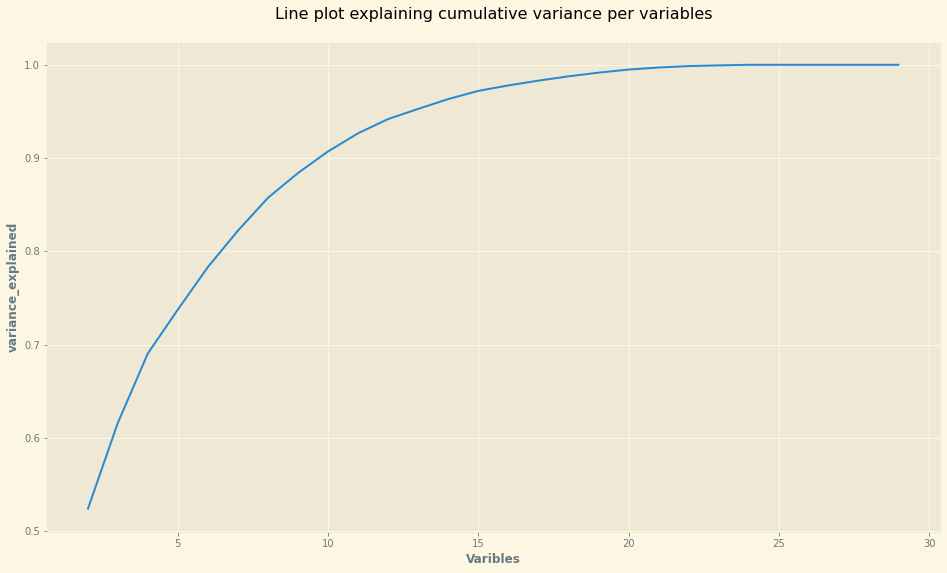

In [ ]:
plt.figure(figsize=(16,9))
pd.Series(variance_ratio).plot()
plt.xlabel('Varibles',fontweight='bold')
plt.ylabel('variance_explained',fontweight='bold')
plt.title('Line plot explaining cumulative variance per variables\n',color='black')
plt.show()

In [ ]:
data_pca1=PCA(n_components=10).fit(data)

In [ ]:
reduced_data=data_pca1.fit_transform(data)

In [ ]:
new_data=pd.DataFrame(reduced_data)

In [ ]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.188396,-3.070210,0.137455,-0.310593,0.600068,0.666359,-0.109079,-0.092803,1.331802,0.093473
1,2.752917,3.019183,0.065629,-2.217447,1.858652,-1.484712,-0.284250,1.200089,-0.686398,-0.276293
2,-0.921254,-0.461314,1.060613,1.737337,-0.646936,-2.364962,0.175981,-1.200094,0.293689,0.116551
3,-2.578354,0.371504,9.289047,1.307269,0.891738,5.953603,-0.386491,-2.199039,-3.020621,-0.300957
4,1.823000,-2.134724,0.540979,1.347997,0.220009,-0.672220,0.048728,1.038147,0.165684,0.390224


In [ ]:
pd.DataFrame(data_pca1.components_.T,columns=['PC_'+str(i) for i in range(10)],index=data.columns)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
BALANCE,5.925300e-02,3.227019e-01,-0.049094,0.250006,0.266896,-0.111324,7.379664e-03,-2.053107e-01,-0.012860,-6.863021e-03
BALANCE_FREQUENCY,-3.630382e-02,1.569279e-01,-0.182131,0.387468,-0.133159,-0.156116,-2.591841e-02,1.389038e-01,-0.378481,6.306219e-01
PURCHASES,-3.272643e-01,1.407779e-01,0.059380,0.021220,-0.068527,0.058297,1.190697e-02,2.182253e-02,0.102969,3.793988e-03
ONEOFF_PURCHASES,-2.613014e-01,1.469203e-01,0.300359,0.083290,-0.225603,-0.100012,2.402942e-02,-2.549555e-02,0.081424,-3.201262e-02
INSTALLMENTS_PURCHASES,-2.722387e-01,6.359852e-02,-0.310027,-0.046933,0.113412,0.262061,-1.546949e-02,-4.564000e-03,0.105021,4.169649e-02
CASH_ADVANCE,1.745980e-01,3.071640e-01,-0.041198,-0.188863,-0.056704,0.068350,-9.610630e-03,-9.550463e-02,-0.031090,-1.156415e-01
PURCHASES_FREQUENCY,-2.851644e-01,-5.482351e-04,-0.280554,0.040598,-0.193047,-0.032939,2.148136e-02,-1.195790e-01,-0.223299,-2.053329e-01
ONEOFF_PURCHASES_FREQUENCY,-2.337772e-01,1.151610e-01,0.153272,0.079930,-0.358497,-0.382201,4.308753e-02,-4.592028e-02,0.284132,3.437989e-03
PURCHASES_INSTALLMENTS_FREQUENCY,-2.370473e-01,-1.481965e-02,-0.404147,0.006760,-0.034079,0.162101,1.067536e-02,-1.040651e-01,-0.327742,-2.709370e-01
CASH_ADVANCE_FREQUENCY,1.908781e-01,2.886634e-01,-0.055625,-0.098802,-0.266731,0.133327,1.196407e-02,-6.820061e-03,0.028219,8.972179e-02


In [ ]:
pd.Series(data_pca1.explained_variance_ratio_,index=['PC_'+str(i) for i in range(10)])

PC_0    0.292983
PC_1    0.230243
PC_2    0.092610
PC_3    0.074603
PC_4    0.047190
PC_5    0.045618
PC_6    0.039016
PC_7    0.035215
PC_8    0.026600
PC_9    0.023113
dtype: float64

>> ## **KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster4=KMeans(n_clusters=4,random_state=5)
cluster4.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

>> ## **Cluster Error**

In [ ]:
cluster_error=[]
for i in range(1,30):
  clusters=KMeans(i)
  clusters.fit(reduced_data)
  cluster_error.append(clusters.inertia_)

In [ ]:
cluster_data=pd.DataFrame({"No. of Clusters":range(1,30),"Cluster Error":cluster_error})

In [ ]:
cluster_data

,No. of Clusters,Cluster Error
0,1,207597.133046
1,2,160060.061813
2,3,125723.609579
3,4,113471.554567
4,5,104846.426419
5,6,97566.304983
6,7,90199.031084
7,8,83309.555045
8,9,78078.697619
9,10,74325.166682


Text(0, 0.5, 'Cluster Error')

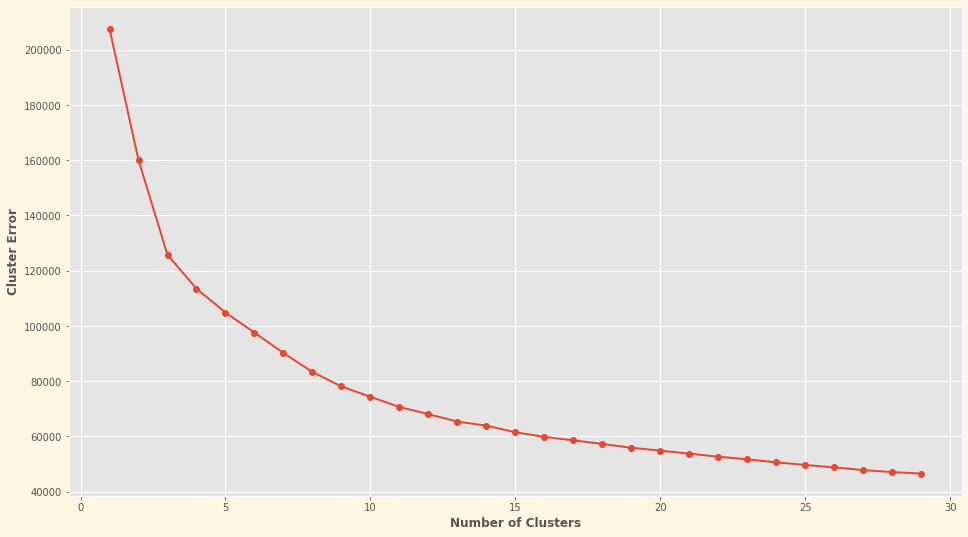

In [ ]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
plt.plot(cluster_data['No. of Clusters'],cluster_data['Cluster Error'],marker='o')
plt.xlabel('Number of Clusters',fontweight='bold')
plt.ylabel('Cluster Error',fontweight='bold')

>> ## **Sillhouette Coefficient**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
scores=[]
for i in range(2,30):
  km=KMeans(n_clusters=i,random_state=5)
  km.fit(reduced_data)
  scores.append(silhouette_score(reduced_data,km.labels_))

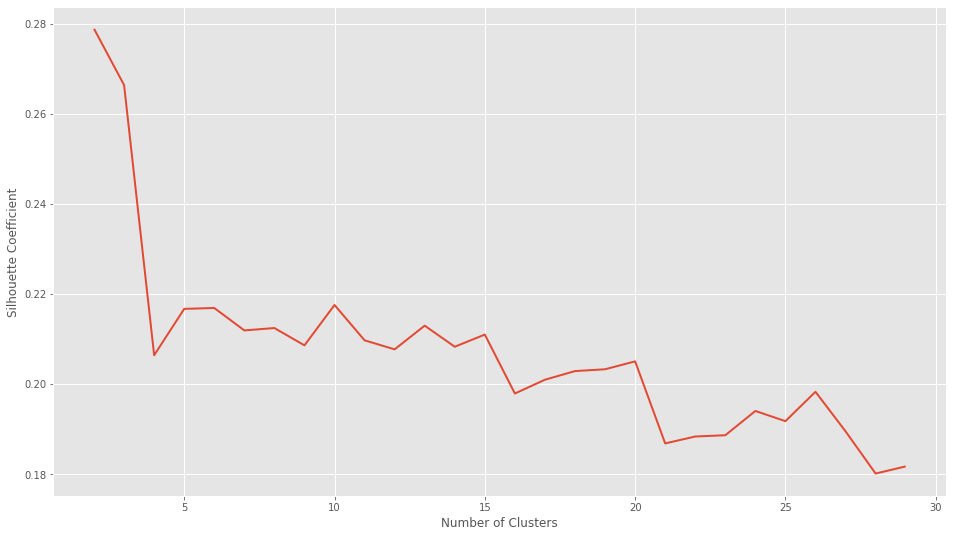

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(range(2,30),scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
data_pair_plot=pd.DataFrame(reduced_data,columns=['PC_'+str(i) for i in range(10)])
data_pair_plot['cluster']=cluster4.labels_

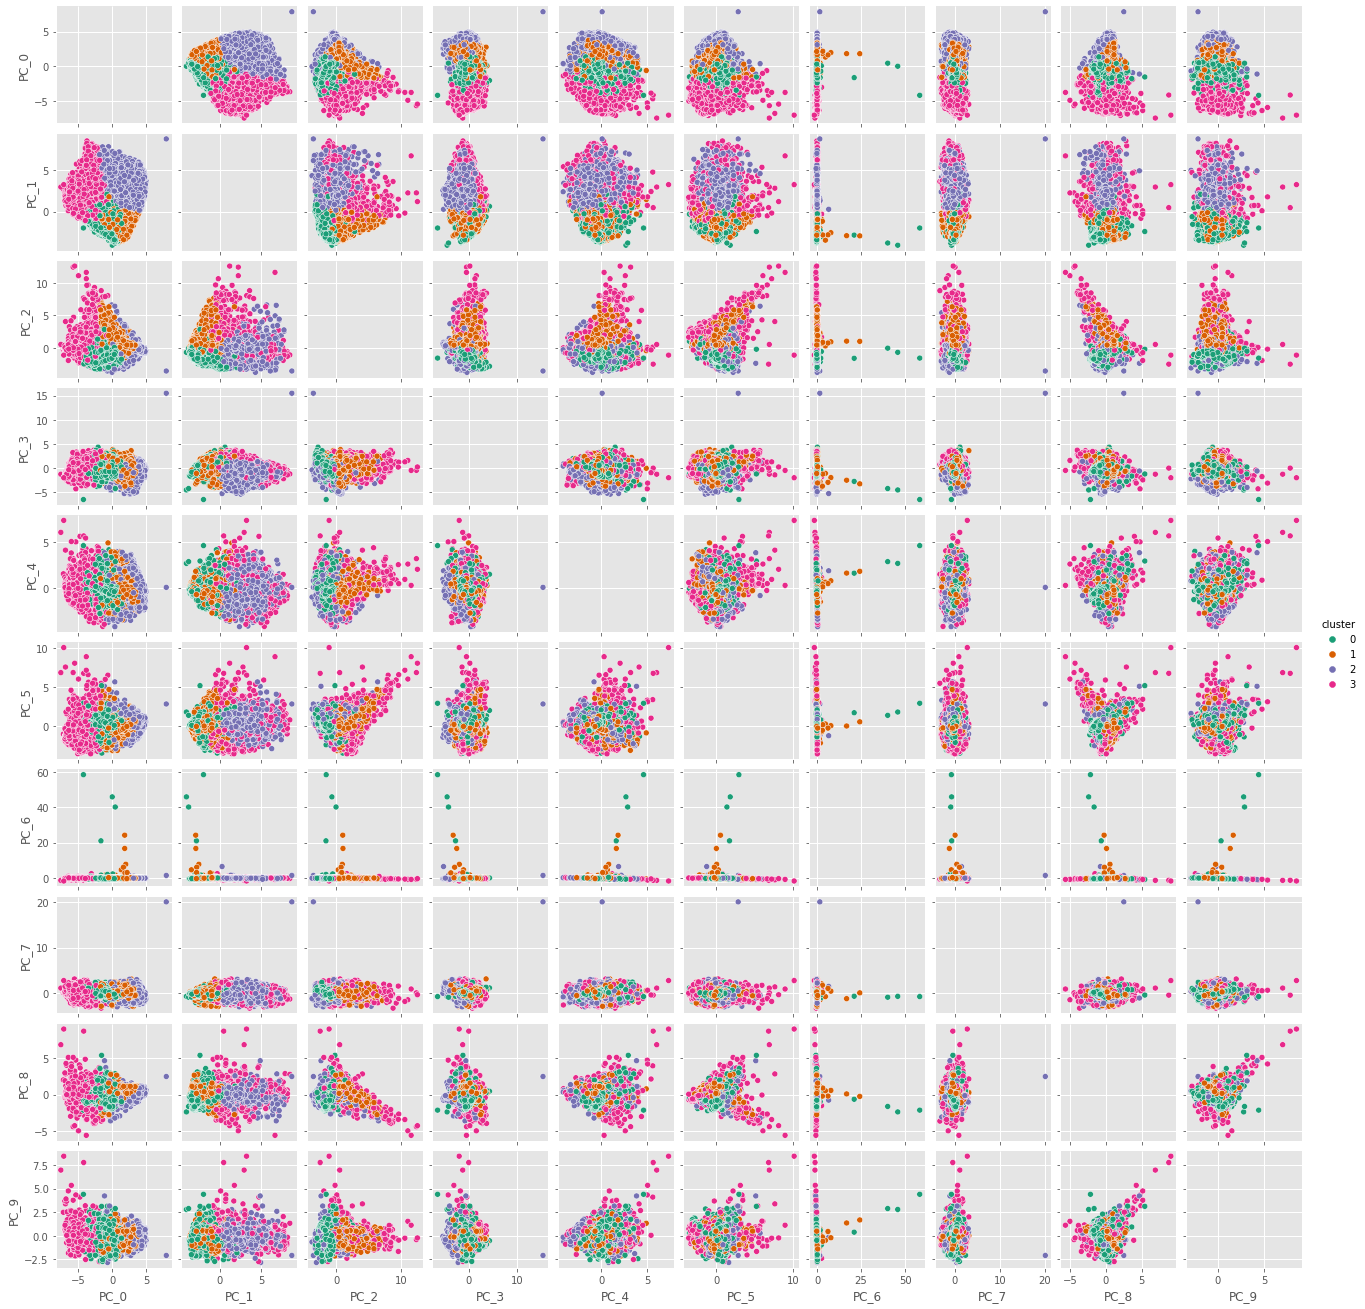

In [ ]:
sns.pairplot(data_pair_plot,hue='cluster',palette='Dark2',diag_kind='kde,',size=1.85)

In [ ]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Adv_Amt',
       'Avg_Amt_Per_Purchase', 'Avg_1off_Purches_Amt', 'Avg_Ins_Purches_Amt',
       'Avg_Csh_Adv_Trsn', 'Limit_Usage', 'Pay_MinPay_Ratio',
       'Monthly_Payments', 'Both', 'Installments Only', 'Oneoff Only'],
      dtype='object')

In [ ]:
sel_cols=['PURCHASES_TRX','Monthly_Avg_Purchase','Monthly_Cash_Adv_Amt','Limit_Usage','CASH_ADVANCE_TRX',
         'Pay_MinPay_Ratio','Installments Only','Oneoff Only','Both','CREDIT_LIMIT']

In [ ]:
cluster_df_4=pd.concat([data[sel_cols],pd.Series(cluster4.labels_,name='Cluster_4')],axis=1)

In [ ]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Adv_Amt,Limit_Usage,CASH_ADVANCE_TRX,Pay_MinPay_Ratio,Installments Only,Oneoff Only,Both,CREDIT_LIMIT,Cluster_4
0,-0.737970,-0.729687,-0.673507,-0.879288,-0.697293,-0.058708,1,0,0,-1.010503,1
1,-0.891333,-0.838160,2.115343,0.219568,0.473089,-0.038114,0,0,0,0.762757,2
2,0.028848,0.040957,-0.673507,-0.109642,-0.697293,-0.062644,0,1,0,0.910528,1
3,-0.814651,0.866246,-0.467401,-0.401013,-0.404697,-0.071226,0,1,0,0.910528,3
4,-0.814651,-0.819967,-0.673507,0.810239,-0.697293,-0.047245,0,1,0,-0.951394,1


In [ ]:
cluster_4=cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,0.203528,-0.653846,-0.526717,1.390122
Monthly_Avg_Purchase,-0.129331,-0.587835,-0.520845,1.714682
Monthly_Cash_Adv_Amt,-0.608489,-0.310103,1.548323,-0.265246
Limit_Usage,-0.463132,0.144611,0.518154,-0.166906
CASH_ADVANCE_TRX,-0.615331,-0.272742,1.532067,-0.303019
Pay_MinPay_Ratio,0.043097,-0.013878,-0.036664,0.004278
Installments Only,0.670924,0.134929,0.119256,0.034014
Oneoff Only,0.019583,0.394151,0.204595,0.151927
Both,0.309493,0.102692,0.165208,0.814059
CREDIT_LIMIT,-0.321207,-0.385519,0.415901,0.654351
